In [1]:
using Pkg

In [2]:
Pkg.add("LinearAlgebra")

    Updating registry at `C:\Users\willisb\.julia\registries\General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
    Updating `C:\Users\willisb\.julia\environments\v1.7\Project.toml`
  [37e2e46d] + LinearAlgebra
  No Changes to `C:\Users\willisb\.julia\environments\v1.7\Manifest.toml`


In [3]:
using LinearAlgebra

In [4]:
using Gadfly

In [5]:
function trimatrix(i,j,x)
    if i == j
        2
    elseif abs(i-j) == 1
        x
    else
        0
    end
end

trimatrix (generic function with 1 method)

In [6]:
M = [trimatrix(i,j,-1) for i = 1:10,j = 1:10]

10×10 Matrix{Int64}:
  2  -1   0   0   0   0   0   0   0   0
 -1   2  -1   0   0   0   0   0   0   0
  0  -1   2  -1   0   0   0   0   0   0
  0   0  -1   2  -1   0   0   0   0   0
  0   0   0  -1   2  -1   0   0   0   0
  0   0   0   0  -1   2  -1   0   0   0
  0   0   0   0   0  -1   2  -1   0   0
  0   0   0   0   0   0  -1   2  -1   0
  0   0   0   0   0   0   0  -1   2  -1
  0   0   0   0   0   0   0   0  -1   2

In [7]:
cond(M,Inf)

60.00000000000001

In [8]:
function Mc(x,n)
    cond([trimatrix(i,j,x) for i = 1:n, j = 1:n], Inf)
end

Mc (generic function with 1 method)

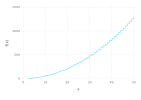

In [9]:
plot(n -> Mc(-1,floor(n)), 2,50)

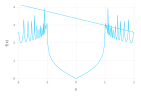

In [10]:
plot(x -> log10(Mc(x,50)), -2,2)

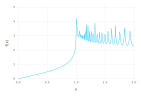

In [11]:
plot(x -> log10(Mc(x,100)), 0,2)

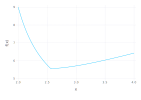

In [12]:
plot(x -> Mc(x,3), 2,4)

In [13]:
FFF = x -> 2*(abs(x)+1)*max((abs(x)+1)/abs(x^2-2),(abs(x^2-4)+2*abs(x)+x^2)/(4*abs(x^2-2)))

#13 (generic function with 1 method)

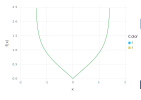

In [14]:
plot([x -> log10(Mc(x,3)), x -> log10(FFF(x))], -1.4,1.4)